Analyis:
Temperature decreases as you move north from the equator in the Northern Hemisphere in strongly linear fashion
Temperature decreases as you move south from the equator in the Southern Hemisphere in a strong linear fashion
In the Northern Hemisphere Humidity is very weakly correlated to increase as you increase in latitude
In the Southern Hemisphere Humidity is weakly correlated to decrease as you move south in latitude
Cloudiness is not correlated to latitude in the Northern Hemisphere
Cloudiness is not correlated to latitude in the Southern Hemisphere

In [ ]:
WeatherPy
Note
Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.WeatherPy
Note
Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude - pip install
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations and zip into a list of tuples
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using the Citypy package to return a unique city and country code
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Combine the two lists into a list of tuples using the zip function
city_country = zip(cities,countries)

# Print the city count to confirm sufficient count ( Greater than 500 )
print(len(cities))

597


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lists to hold reponse info
city_id = []
city_name = []
country = []
latitude = []
longitude = []
weather_date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Open file to write results of API calls - success or not into a txt file, as well as all data pulled into a csv
myprintlog = open('weatherAPI_printlog.txt', 'w')
myAPIdata = open('weatherAPI_data.csv', 'w')

# Write header line for csv file
myAPIdata.write("city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed\n")

# Loop through the list of tuples of cities,country codes and perform a request for data on each
for city,country_code in city_country:
    query_url = f"{url}appid={api_key}&q={city},{country_code}&units={units}"
    response = requests.get(query_url).json()

    # Try to grab the temp,humidity,cloudiness and wind speed if they are available in the Weather API
    # if the city is not found on the WeatherAPI site then the "except" will catch the error and the loop will
    # continue to go through the rest of the city,country_codes in the city_country list
    try:
        # Create variables for each response item and format to desired datatype
        cityID = int(response['id'])
        cityName = response['name']
        countryCode = response['sys']['country']
        lat_val = response['coord']['lat']
        lon_val = response['coord']['lon']
        weatherDate = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        temperature = response['main']['temp']
        humidity_val = response['main']['humidity']
        cloudiness_val = response['clouds']['all']
        windSpeed = response['wind']['speed']
        
        # Append retreived values to lists above using the variables created above
        city_id.append(cityID)
        city_name.append(cityName)
        country.append(countryCode)
        latitude.append(lat_val)
        longitude.append(lon_val)
        weather_date.append(weatherDate)
        temp.append(temperature)
        humidity.append(humidity_val)
        cloudiness.append(cloudiness_val)
        wind_speed.append(windSpeed)
        
        # Output line to terminal to mark progress and store it to a print log text file
        print(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        myprintlog.write(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        
        # Output all retreived values to a csv file
        myAPIdata.write(f"{cityID},{cityName},{countryCode},{lat_val},{lon_val},{weatherDate},\
            {temperature},{humidity_val},{cloudiness_val},{windSpeed}\n")
        
    # Handle exceptions for a city that is not available in the Weather API
    except:
        
        print(f"{city},{country_code} was not found in the Weathermap API\n")
        myprintlog.write(f"{city},{country_code} was not found in the Weathermap API\n")
        
        # Append null values so lists are all the same length (later we will remove nulls from dataframe)
        city_id.append(None)
        city_name.append(None)
        country.append(None)
        latitude.append(None)
        longitude.append(None)
        weather_date.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        pass
    
# Close the file handle after completion of the loop
myprintlog.close()
myAPIdata.close()

Jumla with city ID:1283285 was found in the Weathermap API

Rikitea with city ID:4030556 was found in the Weathermap API

Atar with city ID:2381334 was found in the Weathermap API

Torbay with city ID:6167817 was found in the Weathermap API

Markova with city ID:2023469 was found in the Weathermap API

Sistranda with city ID:3139597 was found in the Weathermap API

Cidreira with city ID:3466165 was found in the Weathermap API

Binzhou with city ID:1816336 was found in the Weathermap API

Iqaluit with city ID:5983720 was found in the Weathermap API

taolanaro,mg was not found in the Weathermap API

Yumen with city ID:1528998 was found in the Weathermap API

Līsakovsk with city ID:1521315 was found in the Weathermap API

lisakovsk,kz was not found in the Weathermap API

Musoma with city ID:152451 was found in the Weathermap API

Faanui with city ID:4034551 was found in the Weathermap API

Puerto Ayora with city ID:3652764 was found in the Weathermap API

Mar del Plata with city ID:343086

Banda Aceh with city ID:1215502 was found in the Weathermap API

Port Lincoln with city ID:2063036 was found in the Weathermap API

Kruisfontein with city ID:986717 was found in the Weathermap API

Ambilobe with city ID:1082243 was found in the Weathermap API

Ribeira Grande with city ID:3372707 was found in the Weathermap API

Vidim with city ID:2013406 was found in the Weathermap API

Assinovskaya with city ID:580545 was found in the Weathermap API

Vaini with city ID:4032243 was found in the Weathermap API

Victoria with city ID:241131 was found in the Weathermap API

Qaanaaq with city ID:3831208 was found in the Weathermap API

Dehlorān with city ID:136702 was found in the Weathermap API

dehloran,ir was not found in the Weathermap API

Florianópolis with city ID:6323121 was found in the Weathermap API

kegayli,uz was not found in the Weathermap API

Severo-Kuril'sk with city ID:2121385 was found in the Weathermap API

Narsaq with city ID:3421719 was found in the Weathermap API

Lo

Ilulissat with city ID:3423146 was found in the Weathermap API

Tura with city ID:2014833 was found in the Weathermap API

Petropavlovsk-Kamchatskiy with city ID:2122104 was found in the Weathermap API

Castro with city ID:3896218 was found in the Weathermap API

Bambous Virieux with city ID:1106677 was found in the Weathermap API

Barra de Tecoanapa with city ID:3516171 was found in the Weathermap API

Slave Lake with city ID:6149374 was found in the Weathermap API

Murgab with city ID:1218612 was found in the Weathermap API

nizhneyansk,ru was not found in the Weathermap API

Bathsheba with city ID:3374083 was found in the Weathermap API

Aykhal with city ID:2027296 was found in the Weathermap API

San Quintín with city ID:3984997 was found in the Weathermap API

Georgetown with city ID:2411397 was found in the Weathermap API

wahran,dz was not found in the Weathermap API

Rexburg with city ID:5605242 was found in the Weathermap API

Riberalta with city ID:3906466 was found in the We

Kavieng with city ID:2094342 was found in the Weathermap API

Slatina with city ID:3192932 was found in the Weathermap API

Meulaboh with city ID:1214488 was found in the Weathermap API

Kaihua with city ID:1804874 was found in the Weathermap API

Karratha with city ID:6620339 was found in the Weathermap API

Kill with city ID:2963388 was found in the Weathermap API

Severnyy with city ID:496358 was found in the Weathermap API

Sakakah with city ID:102527 was found in the Weathermap API

Vostok with city ID:2013279 was found in the Weathermap API

Cabo San Lucas with city ID:3985710 was found in the Weathermap API

Vallenar with city ID:3868633 was found in the Weathermap API

Bilibino with city ID:2126682 was found in the Weathermap API

Tagāb with city ID:1123424 was found in the Weathermap API

tagab,af was not found in the Weathermap API

Wairoa with city ID:2206808 was found in the Weathermap API

Tautira with city ID:4033557 was found in the Weathermap API

Tongren with city ID:1

Nyagan with city ID:1496476 was found in the Weathermap API

Pemangkat with city ID:1631637 was found in the Weathermap API

Katsuura with city ID:2112309 was found in the Weathermap API

Duncan with city ID:5943865 was found in the Weathermap API

Rawson with city ID:3839307 was found in the Weathermap API

Moindou with city ID:2140466 was found in the Weathermap API

Arlit with city ID:2447513 was found in the Weathermap API

Roebourne with city ID:2062276 was found in the Weathermap API

Vila Franca do Campo with city ID:3372472 was found in the Weathermap API

Naze with city ID:1855540 was found in the Weathermap API

Omsukchan with city ID:2122493 was found in the Weathermap API

Yerbogachën with city ID:2012956 was found in the Weathermap API

Tual with city ID:1623197 was found in the Weathermap API

Labuhan with city ID:8079926 was found in the Weathermap API

Pokhara with city ID:1282898 was found in the Weathermap API

Davila with city ID:1715335 was found in the Weathermap A

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary from the lists that we created above
weather_dict = {
    "city_id": city_id,
    "city_name": city_name,
    "country": country,
    "latitude": latitude,
    "longitude": longitude,
    "weather_date": weather_date,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed
}

# Use the dictionary to create a dataframe named weather_data
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,1283285.0,Jumla,NP,29.2747,82.1838,04/30/21,47.55,80.0,60.0,3.98
1,4030556.0,Rikitea,PF,-23.1203,-134.9692,04/30/21,78.78,78.0,91.0,20.40
2,2381334.0,Atar,MR,20.5169,-13.0499,04/30/21,83.70,18.0,34.0,4.74
3,6167817.0,Torbay,CA,47.6666,-52.7314,04/30/21,38.10,87.0,90.0,13.80
4,2023469.0,Markova,RU,52.2132,104.2054,04/30/21,33.80,93.0,40.0,2.24


In [5]:
# Make a dataframe that has only non-null values (so linear regression can be done later)
# First drop the NaN values
weather_data_values = weather_data.dropna()

# Reset the index (it will have gaps in it where the NaN value rows have been deleted)
weather_data_values = weather_data_values.reset_index(drop=True)

# Change the datatype for the city_id field to an integer (it gets created as a float)
weather_data_values['city_id'] = weather_data_values['city_id'].astype(int)
#weather_data_values.head()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

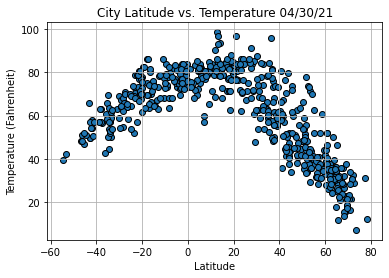

In [6]:
# Build a scatter plot for Latitude vs.Temperature in Fahrenheit
weatherDate = weather_data_values['weather_date'][0]
plt.scatter(weather_data_values["latitude"], weather_data_values["temp"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature {weatherDate}")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Figures/LatitudeVsTemperature.png")

# Show plot
plt.show()

The Latitude vs. Temperature plot has an unexpected result. As you move north of the equator from a latitude of 0 to a latitude of 80 you see what appears to be a linear decrease in temperature from 70 degrees Fahrenheit to -40 degrees Fahrenheit from 20 degrees latitude to around 80 degrees latitude.

## Latitude vs. Humidity Plot

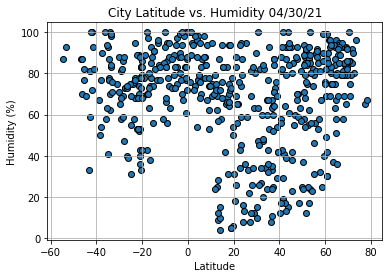

In [7]:
# Build a scatter plot for Latitude vs. Humidity
plt.scatter(weather_data_values["latitude"], weather_data_values["humidity"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {weatherDate}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Figures/LatitudeVsHumidity.png")

# Show plot
plt.show()

The Latitude vs. Humidity plot does not seem to have a strong correlation to latitude. One can say however, that it appears more cities have a humidity above 60% than a humidity below 60%.

## Latitude vs. Cloudiness Plot

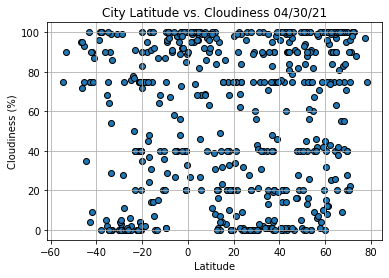

In [8]:
# Build a scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_data_values["latitude"], weather_data_values["cloudiness"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {weatherDate}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Figures/LatitudeVsCloudiness.png")

# Show plot
plt.show()

The Latitude vs. Cloudiness plot does not seem to have any correlation to latitude. One can say however, that there seems to be a collection of points across all latitudes at either 0%, 75% or 100% Cloudy.

## Latitude vs. Wind Speed Plot

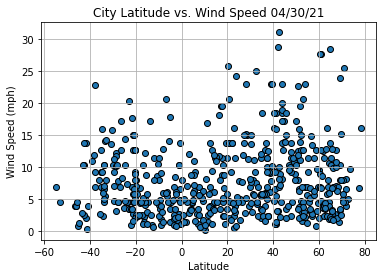

In [9]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data_values["latitude"], weather_data_values["wind_speed"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {weatherDate}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Figures/LatitudeVsWindSpeed.png")

# Show plot
plt.show()

The Latitude vs. Wind Speed scatterplot suggests there is no correlation between Wind Speed and Latitude. One can say that regardless of latitude we see the vast majority of wind speed between 0-20 mph, with most of those falling into the 0-10 mph range.

## Linear Regression

In [10]:
# Make a function that accepts a list of x values and y values, a description for the x and y axes,
# a string that describes which hemisphere is being analyzed and a filename to use while saving the figure
# and finally the x,y coordinates to create the annotation of the equation on the graph
def make_lin_reg_plot(x_values,y_values,x_desc,y_desc,hemisphere,filename,x_ann,y_ann):
    # Print out the r-squared value along with the plot.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere}-\nCity {x_desc} vs. {y_desc} {weatherDate}")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    plt.savefig(f'Figures/{filename}')
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
# store the boolean criteria in a variable to pass to the dataframe indexing function
crit_north = weather_data_values.latitude >= 0
crit_south = weather_data_values.latitude < 0

# Create the north and south hemisphere dataframes using boolean indexing from the criteria from above 
north_weather = weather_data_values[crit_north]
south_weather = weather_data_values[crit_south]

# The indexes will not be continuous so they need to be reset with the drop=True argument so we don't make
# the prior index as a column
north_weather = north_weather.reset_index(drop=True)
south_weather = south_weather.reset_index(drop=True)
#north_weather.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8682007317686882
y = -0.91x + 93.06


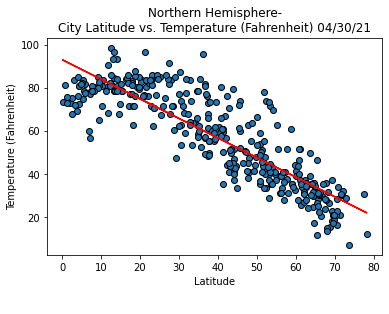

In [13]:
make_lin_reg_plot(north_weather["latitude"],north_weather["temp"],\
                  'Latitude','Temperature (Fahrenheit)','Northern Hemisphere',\
                 'NorthHemiLatVsTemp.png',6,-20)

In [ ]:
This scatterplot with linear regression has and r-squared value of -0.87, so there is a strong negative linear relationship between decreasing latitude and decreasing temperature in the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8021169428623469
y = 0.65x + 82.13


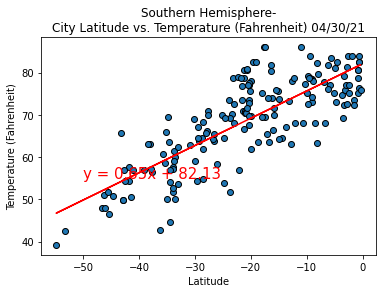

In [14]:
make_lin_reg_plot(south_weather["latitude"],south_weather["temp"],\
                  'Latitude',f'Temperature (Fahrenheit)','Southern Hemisphere',\
                 'SouthHemiLatVsTemp.png',-50,55)

This scatterplot with linear regression has and r-squared value of -0.80, so there is a strong positive linear relationship between increasing latitude and increasing temperature in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1582414168858468
y = 0.2x + 58.38


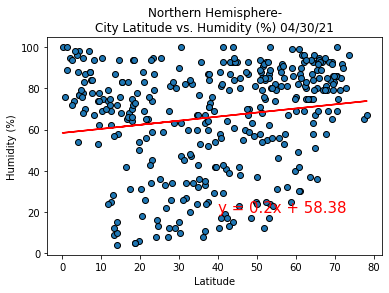

In [15]:
make_lin_reg_plot(north_weather["latitude"],north_weather["humidity"],\
                  'Latitude',f'Humidity (%)','Northern Hemisphere',\
                 'NorthHemiLatVsHumidity.png',40,20)

This scatter plot shows a very weak relationship between latitude and humidity in the Northern Hemisphere with an r-squared value of 0.16.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15394734985485567
y = 0.19x + 80.35


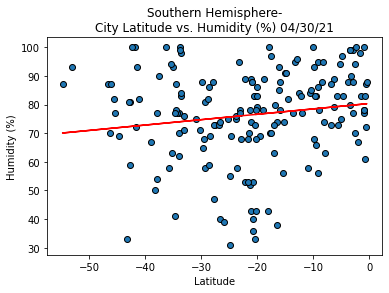

In [16]:
make_lin_reg_plot(south_weather["latitude"],south_weather["humidity"],\
                  'Latitude',f'Humidity (%)','Southern Hemisphere',\
                 'SouthHemiLatVsHumidity.png',-30,20)

This scatter plot shows a very weak relationship between latitude and humidity in the Southern Hemisphere with an r-squared value of 0.15.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10497234875001024
y = 0.19x + 49.89


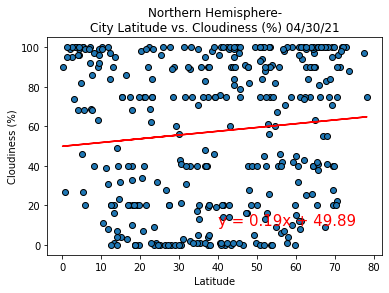

In [17]:
make_lin_reg_plot(north_weather["latitude"],north_weather["cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Northern Hemisphere',\
                 'NorthHemiLatVsCloudiness.png',40,10)

In the Northern Hemisphere there does not seem to be a significant correlation between latitude and cloudiness. The linear regression curve fit yields an equation of the line with an r-squared value of only 0.10.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10599258418499848
y = 0.31x + 57.44


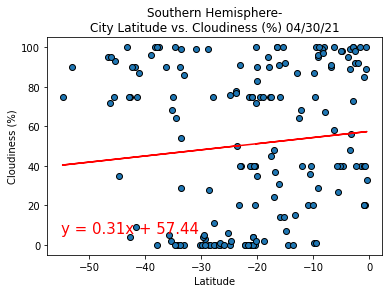

In [18]:
make_lin_reg_plot(south_weather["latitude"],south_weather["cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Southern Hemisphere',\
                 'SouthHemiLatVsCloudiness.png',-55,6)

In the Southern Hemisphere there does not seem to be a significant correlation between latitude and cloudiness. The linear regression curve fit yields an equation of the line with an r-squared value of only 0.10.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10226476693968246
y = 0.03x + 6.99


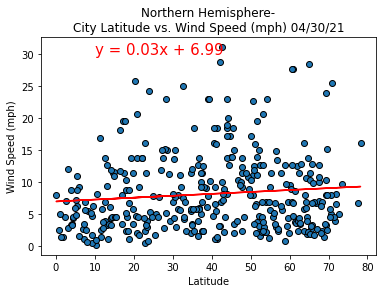

In [19]:
make_lin_reg_plot(north_weather["latitude"],north_weather["wind_speed"],\
                  'Latitude',f'Wind Speed (mph)','Northern Hemisphere',\
                 'NorthHemiLatVsWindSpeed.png',10,30)

There is almost no correlation between latitude and wind speed in the Northern Hemisphere. The linear regression gives us a weak r-squared value of .10.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1661649737481625
y = -0.06x + 5.63


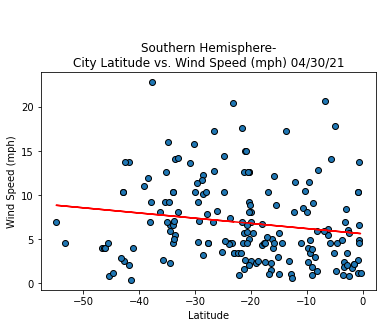

In [20]:
make_lin_reg_plot(south_weather["latitude"],south_weather["wind_speed"],\
                  'Latitude',f'Wind Speed (mph)','Southern Hemisphere',\
                 'SouthHemiLatVsWindSpeed.png',-30,30)

There is almost no correlation between latitude and wind speed in the Soiuthern Hemisphere. The linear regression gives us a weak r-squared value of .17.